In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

ImportError: No module named tensorflow

In [17]:
epochs = 10_000

x_values = np.array([[0.0],
                     [1.0]])
#y_values = np.array(tf.one_hot([1,0], 2))
y_values = np.array([[1.0],
                     [0.0]])

In [18]:
x = tf.placeholder(dtype = tf.float32 ,shape = [None, 1], name = "X_placeholder")
y_true = tf.placeholder(dtype = tf.float32 ,shape = [None, 1], name = "Y_placeholder") 

In [19]:
W = tf.Variable(tf.zeros([1,1], dtype=tf.float32), dtype = tf.float32, shape = [1,1], name = "W_matrix")
b = tf.Variable(0, dtype = tf.float32, name = "bias")


In [20]:
logits =  tf.add(tf.matmul(x, W),b)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=logits)

init = tf.global_variables_initializer();

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        rand_ind = np.random.randint(low = 0, high = len(x_values), size = 1)
        feed = {x: x_values[rand_ind], y_true: y_values[rand_ind] }
        
        sess.run(train, feed_dict = feed)
        
#    loss_value = loss.eval(feed_dict=feed)    
    model_W = sess.run(W)
    model_b = sess.run(b)
print(model_W)
print(model_b)
    #tf.argmax(one_hot_encoded, axis=1)

[[-5.826352]]
2.7079916


In [21]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

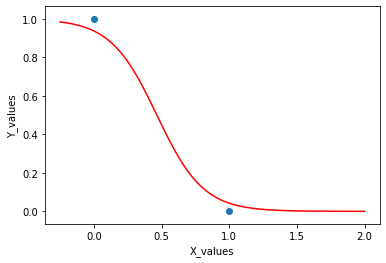

In [23]:
y_hat = []

x_hat = np.linspace(-0.25, 2, 1000)

for data in x_hat:
    y_hat.append(sigmoid(np.multiply(data, model_W)+model_b))

plt.scatter([1,0], [0,1])

plt.plot(x_hat, y_hat, c="r")


plt.xlabel("X_values")
plt.ylabel("Y_values")
plt.show()